In [44]:
%matplotlib inline
import os, sys, gc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import pearsonr 

In [45]:
def around(mat, dp = 3):
    return np.around(mat, dp)
np.random.seed(0)


potentialPermIdx =  np.arange(10000)
print('potential perm idx: {0}'.format(potentialPermIdx[:5]))
np.random.shuffle(potentialPermIdx)
print('potential perm idx: {0}'.format(potentialPermIdx[:5]))
gtLabels = np.squeeze(np.int_(np.load('test_set_cifar_labels.npy')))
reorderedGT = gtLabels[potentialPermIdx]

loadDir = 'preds_scores_9k'
#print(os.listdir(loadDir))
model = 'shake_shake_26_2x64d_SSI_cutout16'



control = np.load('{0}/{1}_True.npz'.format(loadDir, model))
controlTop = np.argmax(control['probs'], axis = 1)
controlLabels = np.argmax(control['labels'], axis = 1)
controlLabelsHard = np.argmax(control['hard_labels'], axis = 1)
actual = np.load('{0}/{1}_False.npz'.format(loadDir, model))
actualTop = np.argmax(actual['probs'], axis = 1)
actualLabels = np.argmax(actual['labels'], axis = 1)
actualLabelsHard = np.argmax(actual['hard_labels'], axis = 1)
humans = np.load('human_bincounts.npy')
humans = humans / np.sum(humans, axis = 1)[:, np.newaxis]
humanTop = np.argmax(humans, axis = 1)

potential perm idx: [0 1 2 3 4]
potential perm idx: [9394  898 2398 5906 2343]


print(list(control.keys()))

print(around(control['labels'][:5]), '\n', around(humans[:5]), '\n',
     around(actual['labels'][:5]))

print(controlLabels[:5], '\n', humanTop[:5], '\n',
     actualLabels[:5])

print(humanTop[:5], '\n',
     gtLabels[:5])

print(controlLabels[:5], '\n', controlLabelsHard[:5], '\n',
     actualLabels[:5], '\n', actualLabelsHard[:5],
      '\n', gtLabels[potentialPermIdx][:5], '\n',
     humanTop[potentialPermIdx][:5])

In [46]:
wrongIdxCon = np.where(controlTop != reorderedGT)[0]
correctIdxCon = np.where(controlTop == reorderedGT)[0]
wrongIdxAct = np.where(actualTop != reorderedGT)[0]
correctIdxAct = np.where(actualTop == reorderedGT)[0]

keys = ['control_soft_labels', 'control_hard_labels', 'control_wrong_hard', 'control_correct_hard',
       'actual_soft_labels', 'actual_hard_labels', 'actual_wrong_hard', 'actual_correct_hard']
candidates = [controlTop, controlTop, controlTop[wrongIdxCon], controlTop[correctIdxCon],
             actualTop, actualTop, actualTop[wrongIdxAct], actualTop[correctIdxAct]]
labels = [controlLabels, controlLabelsHard, controlLabelsHard[wrongIdxCon], controlLabelsHard[correctIdxCon],
         actualLabels, actualLabelsHard, actualLabelsHard[wrongIdxAct], actualLabelsHard[correctIdxAct]]

corrDict = {}
for k, c, l in zip(keys, candidates, labels):
    print(k)
    corrDict[k] = pearsonr(c, l)[0]



print(corrDict)

control_soft_labels
control_hard_labels
control_wrong_hard
control_correct_hard
actual_soft_labels
actual_hard_labels
actual_wrong_hard
actual_correct_hard
{'control_soft_labels': 0.8746086487506933, 'control_hard_labels': 0.8720925631026378, 'control_wrong_hard': -0.3300961985269418, 'control_correct_hard': 1.0, 'actual_soft_labels': 0.8913918331742259, 'actual_hard_labels': 0.8889240382158908, 'actual_wrong_hard': -0.31655004952852195, 'actual_correct_hard': 1.0}


In [47]:
wrongConCon = np.mean(np.max(control['probs'][wrongIdxCon], axis = 1))
correctConCon = np.mean(np.max(control['probs'][correctIdxCon], axis = 1))
wrongActCon = np.mean(np.max(actual['probs'][wrongIdxAct], axis = 1))
correctActCon = np.mean(np.max(actual['probs'][correctIdxAct], axis = 1))

[0.95962644, 0.935319] [0.7656197, 0.6850956]


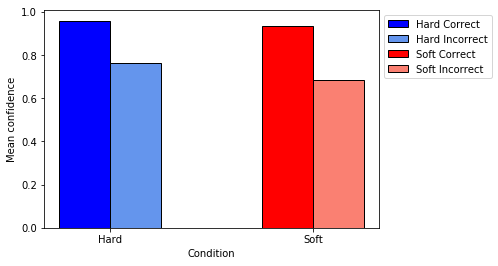

In [50]:
def fig_fn(dataSeries1, dataSeries2):
    # set width of bar
    barWidth = 0.25

    # set height of bar
    print(dataSeries1, dataSeries2)
    # Set position of bar on X axis
    r1 = np.arange(len(dataSeries1))
    r2 = [x + barWidth for x in r1]
 
    # Make the plot
    plt.bar(r1, dataSeries1, color=['blue', 'red'], width=barWidth, edgecolor='k', label='Correct images')
    plt.bar(r2, dataSeries2, color=['cornflowerblue', 'salmon'], width=barWidth, edgecolor='k', label='Incorrect images')
    plt.ylabel('Mean confidence')
    plt.xlabel('Condition')
    # Add xticks'Condition on the middle of the group bars
    plt.xticks([r + barWidth/2 for r in range(len(dataSeries1))], ['Hard', 'Soft'])

    legend_elements = [
                Patch(facecolor='blue', edgecolor='k',
                         label='Hard Correct'),
        Patch(facecolor='cornflowerblue', edgecolor='k',
                         label='Hard Incorrect'),
                   Patch(facecolor='red', edgecolor='k',
                         label='Soft Correct'),
        Patch(facecolor='salmon', edgecolor='k',
                         label='Soft Incorrect')

    ]
    # Create legend & Show graphic
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.0, 1.0))
    plt.show()
fig_fn([correctConCon, correctActCon], [wrongConCon,  wrongActCon])